In [224]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from pandas.plotting import scatter_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor



<p><h3> Introduction of the data with numerical values through box plots and string values through histogram 


<h5> Null values count

In [178]:
df = pd.read_csv('resources/WHO.csv')

df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [214]:
df['Status'] = df['Status'].replace({'Developing': 0, 'Developed': 1})
df.describe()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,...,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,0.174268,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,...,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,0.379405,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,...,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,0.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,...,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,0.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,...,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,0.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,...,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,0.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,...,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,1.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,...,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


C:\Users\prabe\AppData\Local\Temp\ipykernel_19192\735576486.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[mask]


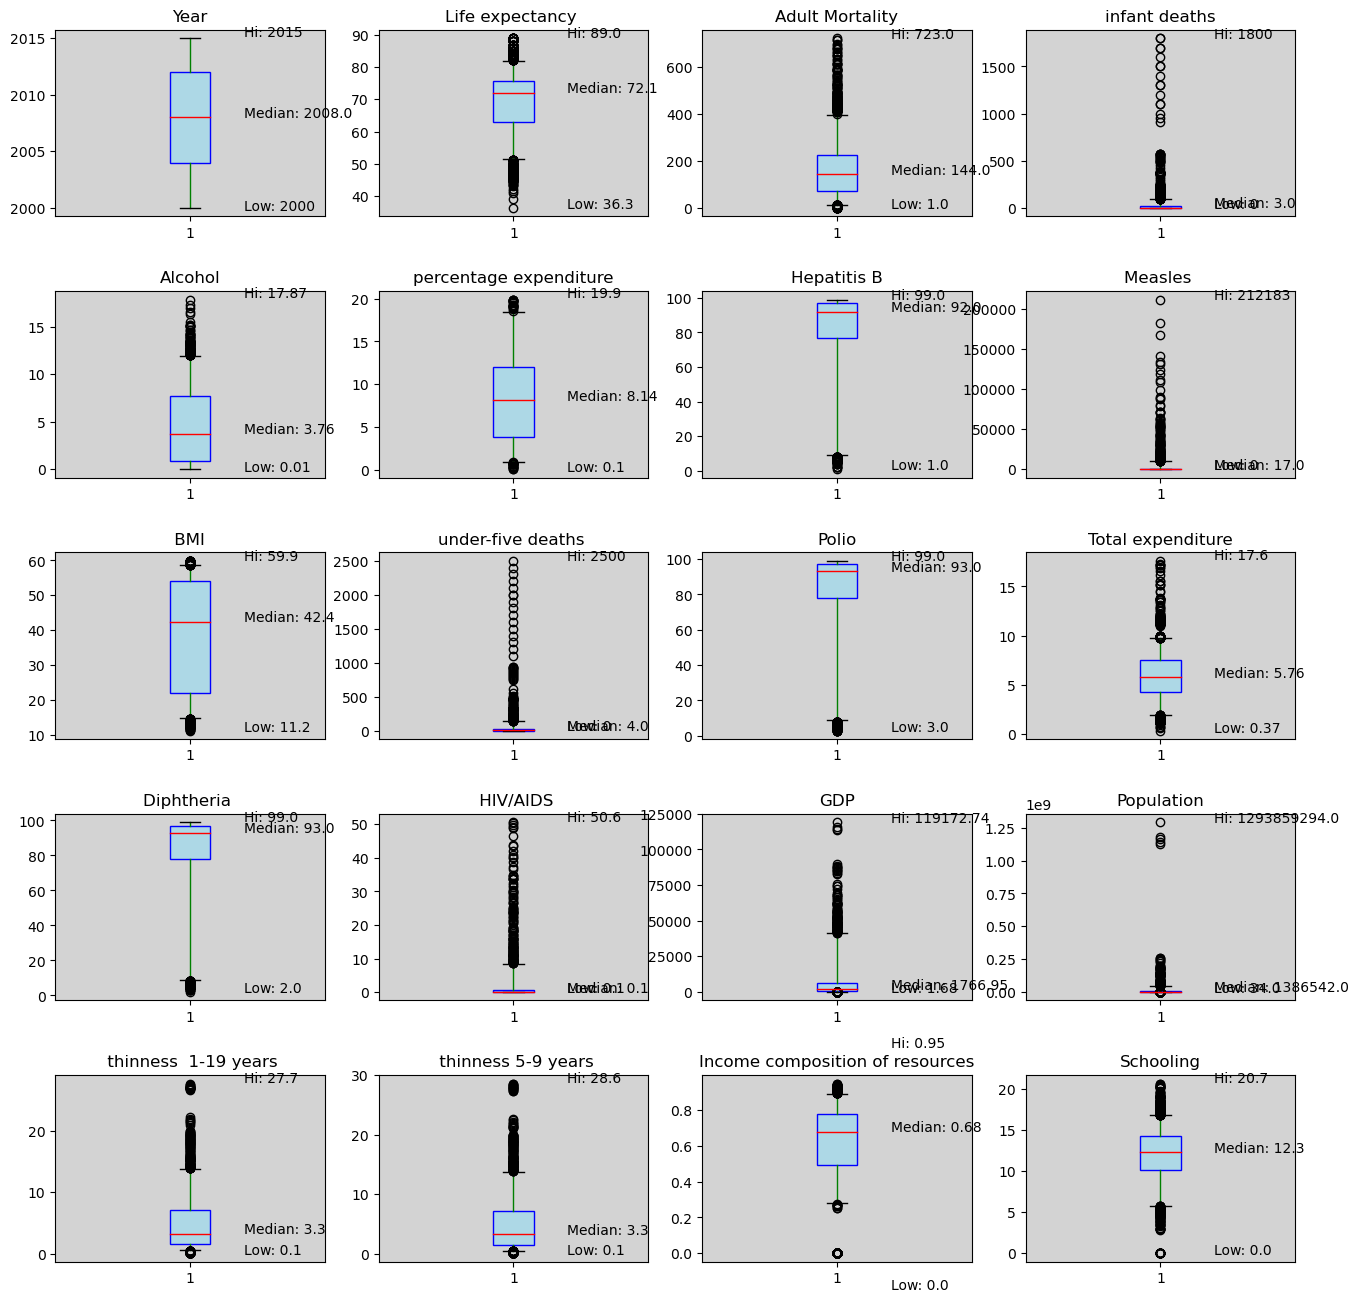

In [180]:
# Get the numerical columns
num_cols = df.select_dtypes(include='number').columns

# Create a 2X10 grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(16,16))


for i, ax in enumerate(axes.flatten()):
    if i < len(num_cols):
        col = num_cols[i]
        # Convert the column to numeric type
        df[col] = pd.to_numeric(df[col], errors='coerce')

        # Filter out rows with missing values
        df1 = df.dropna(subset=[col])

        # filter the BMI data using boolean mask
        if(col==' BMI '):
            mask = (df[col] >= 10) & (df[col] <=60)
            df1 = df1[mask]
        if(col=='Total Expenditure' or col=='percentage expenditure'):
            mask = (df[col] > 0) & (df[col] <=20)
            df1 = df1[mask]    
     
        data = df1[col]

        # Plot the boxplot
        ax.boxplot(data, whis=[5, 95],patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'), medianprops=dict(color='red'), whiskerprops=dict(color='green'), capprops=dict(color='black'))
        ax.set_title(col)

        # Add median, highest, and lowest values
        median = round(np.median(data), 2)
        ax.annotate(f'Median: {median}', xy=(1, median), xytext=(1.2, median))
        hi = round(max(data), 2)
        ax.annotate(f'Hi: {hi}', xy=(1, hi), xytext=(1.2, hi+0.2))
        lo = round(min(data), 2)
        ax.annotate(f'Low: {lo}', xy=(1, lo), xytext=(1.2, lo-0.2))
        # Set the background color of the plot
        ax.set_facecolor('lightgrey')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Show the plot
plt.show()





In [68]:
len(df[(df['percentage expenditure']<=20) & (df['percentage expenditure']>0)])

397

<h4> Increase in life expectancy in developing vs deveoped countries

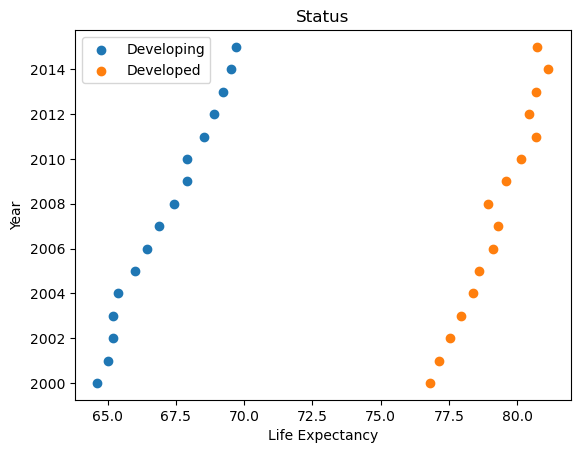

In [77]:

plt.figure()

# Filter out rows with missing values respective columns
df1 = df.dropna(subset=['Status', 'Life expectancy '])

values1 = df1[df1['Status']=='Developing'].groupby('Year')['Life expectancy '].mean()
values2 = df1[df1['Status']=='Developed'].groupby('Year')['Life expectancy '].mean()
year = df1.groupby('Year')['Year'].mean()

plt.scatter(values1, year, label = 'Developing')
plt.scatter(values2, year, label = 'Developed')
plt.xlabel('Life Expectancy')
plt.ylabel('Year')
plt.legend()
plt.title('Status')

# Display the plots
plt.show()

<h3> Relationship between all the attributes (grouped values with respect to year and averaged) and Life Expectancy

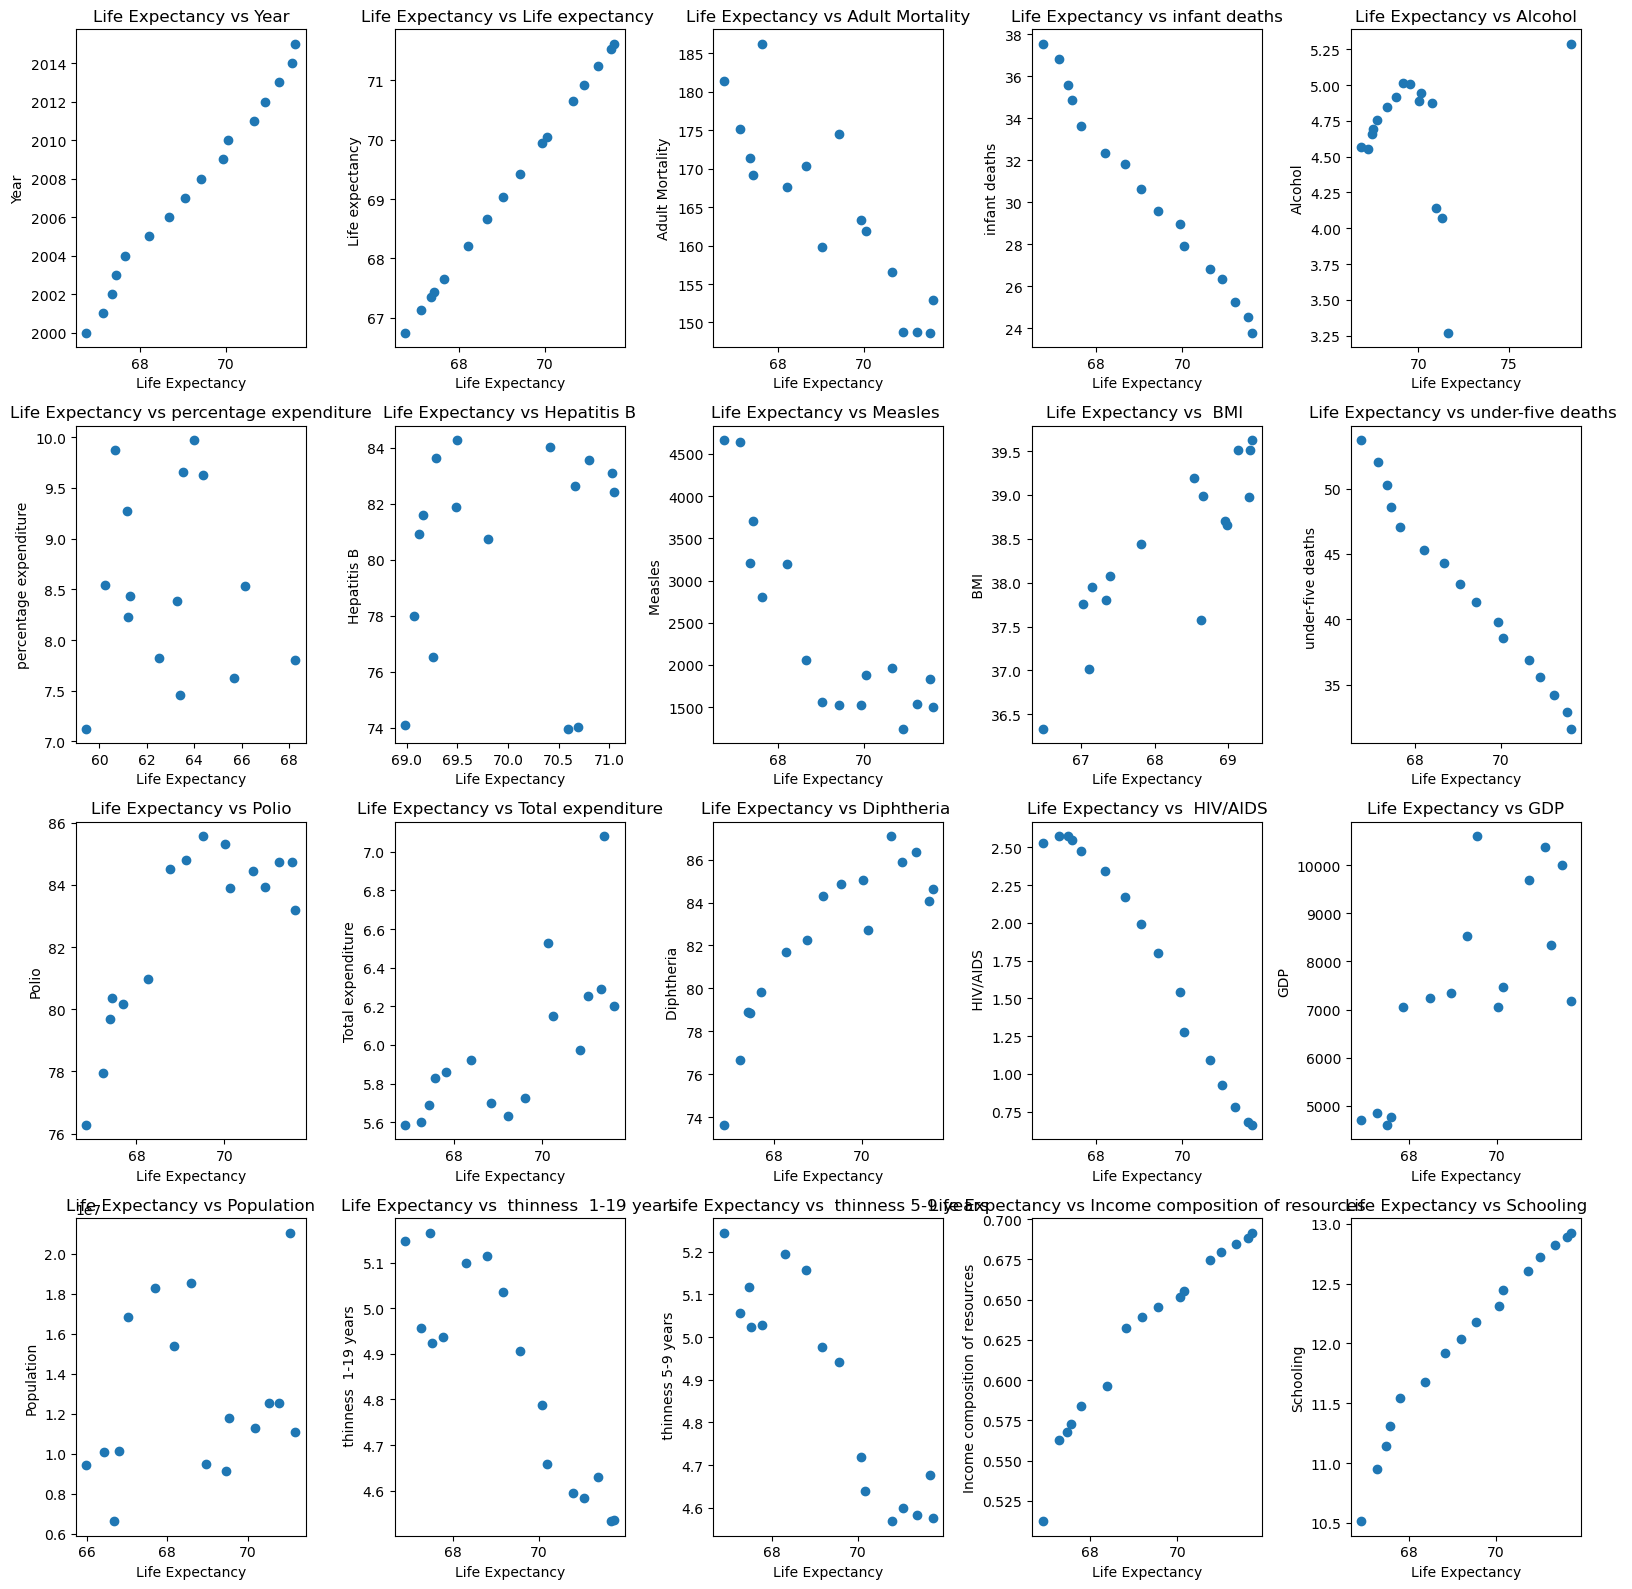

In [55]:
# Get the numerical columns
num_cols = df.select_dtypes(include='number').columns

# Create a 4x4 grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(16, 16))


# Iterate over each subplot and plot the relationship between Life Expectancy and a numerical column
for i, ax in enumerate(axes.flatten()):
    if i < len(num_cols):
        col = num_cols[i]

        # Create a copy of the dataframe
        df1 = df.copy()

        # Convert the column to numeric type
        df1[col] = pd.to_numeric(df1[col], errors='coerce')

        # Filter out rows with missing values in the selected columns
        df1 = df1.dropna(subset=[col, 'Life expectancy '])

        # filter the BMI data using boolean mask
        if(col==' BMI '):
            mask = (df1[col] >= 10) & (df1[col] <=60)
            df1 = df1[mask]
        
        if(col=='Total Expenditure' or col=='percentage expenditure'):
            mask = (df1[col] > 0) & (df1[col] <=20)
            df1 = df1[mask]     

        # Group the data by year and compute the mean life expectancy for each year
        grouped_data1 = df1.groupby('Year')['Life expectancy '].mean()

        # Group the data by year and compute the mean value of the numerical column for each year
        grouped_data2 = df1.groupby('Year')[col].mean()

        # Plot the relationship between Life Expectancy and the numerical column
        ax.scatter(grouped_data1.values, grouped_data2.values)
        ax.set_xlabel('Life Expectancy')
        ax.set_ylabel(col)
        ax.set_title("Life Expectancy vs " + col)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


<h4> Developing Countries

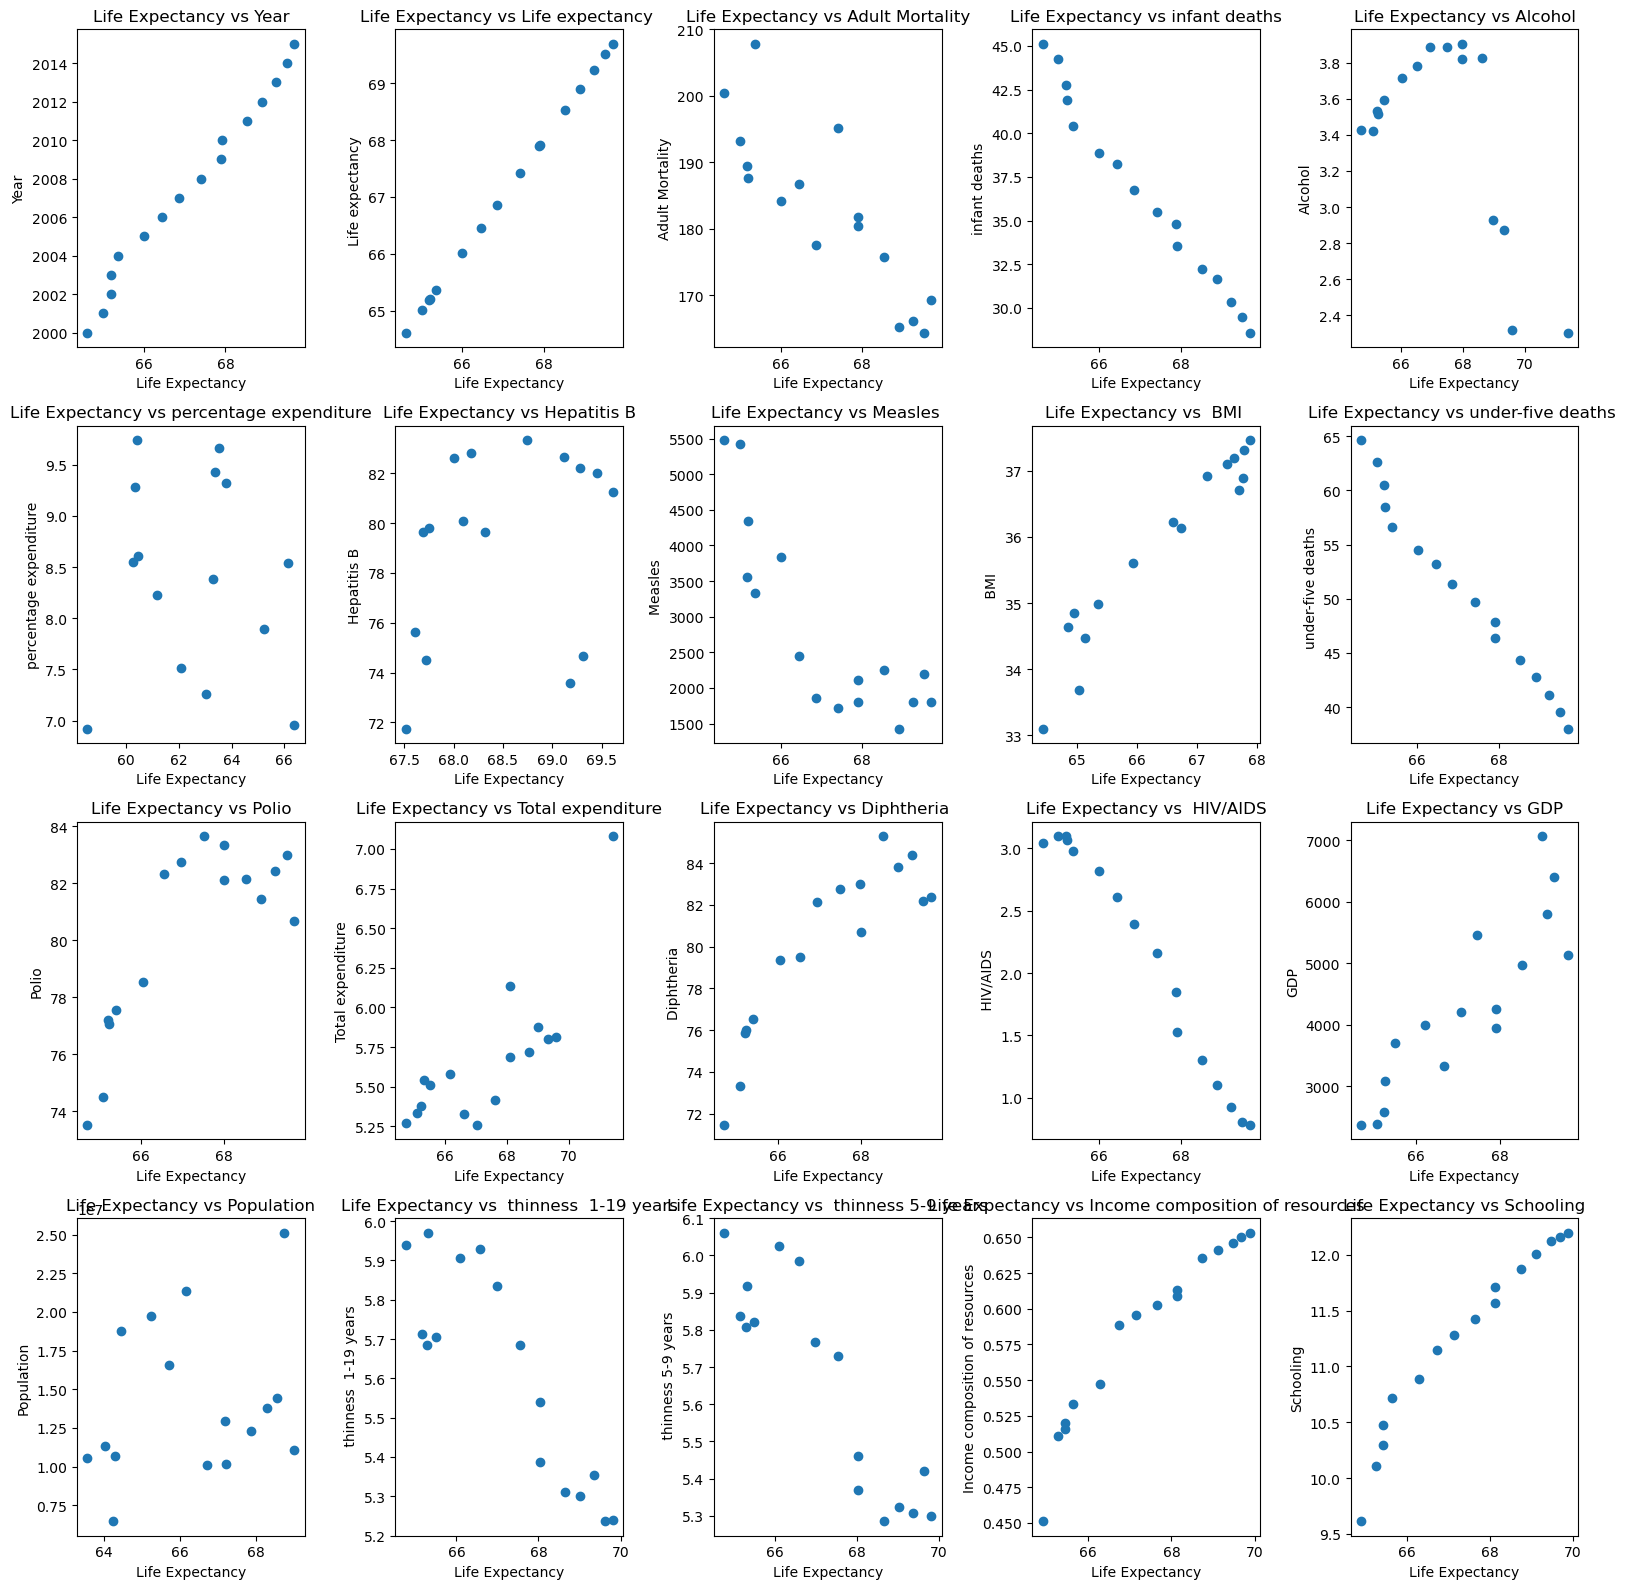

In [59]:
# Get the numerical columns
num_cols = df.select_dtypes(include='number').columns

# Create a 4x4 grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(16, 16))


# Iterate over each subplot and plot the relationship between Life Expectancy and a numerical column
for i, ax in enumerate(axes.flatten()):
    if i < len(num_cols):
        col = num_cols[i]

        # Create a copy of the dataframe
        df1 = df.copy()[df['Status']==0]


        # Convert the column to numeric type
        df1[col] = pd.to_numeric(df1[col], errors='coerce')

        # Filter out rows with missing values in the selected columns
        df1 = df1.dropna(subset=[col, 'Life expectancy '])

        # filter the BMI data using boolean mask
        if(col==' BMI '):
            mask = (df1[col] >= 10) & (df1[col] <=60)
            df1 = df1[mask]
        
        if(col=='Total Expenditure' or col=='percentage expenditure'):
            mask = (df1[col] > 0) & (df1[col] <=20)
            df1 = df1[mask]     

        # Group the data by year and compute the mean life expectancy for each year
        grouped_data1 = df1.groupby('Year')['Life expectancy '].mean()

        # Group the data by year and compute the mean value of the numerical column for each year
        grouped_data2 = df1.groupby('Year')[col].mean()

        # Plot the relationship between Life Expectancy and the numerical column
        ax.scatter(grouped_data1.values, grouped_data2.values)
        ax.set_xlabel('Life Expectancy')
        ax.set_ylabel(col)
        ax.set_title("Life Expectancy vs " + col)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()




<h4>Developed countries

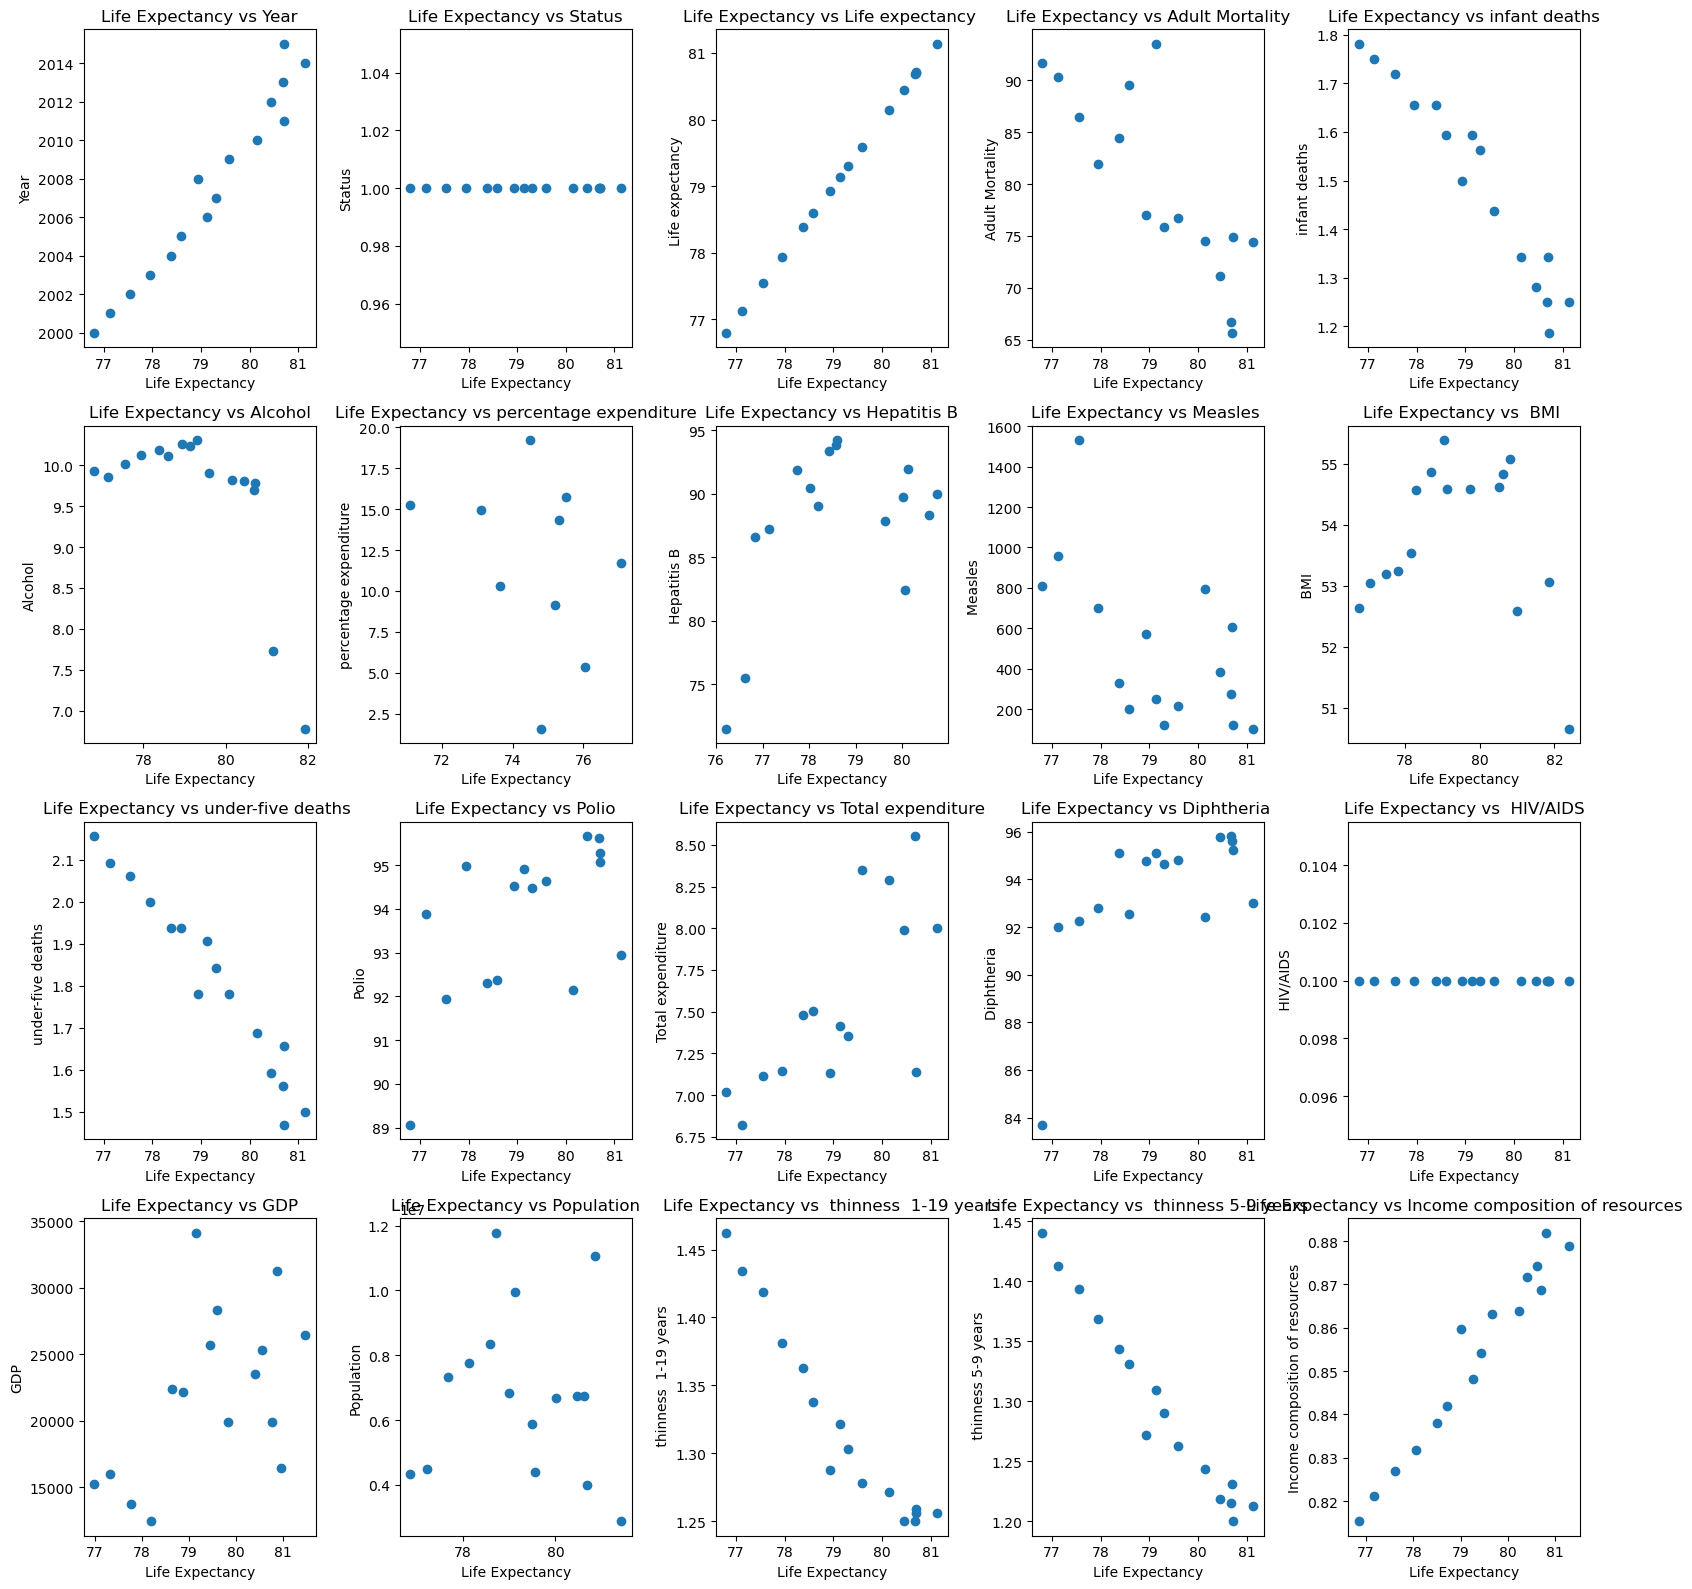

In [218]:
# Get the numerical columns
num_cols = df.select_dtypes(include='number').columns

# Create a 4x4 grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(16, 16))


# Iterate over each subplot and plot the relationship between Life Expectancy and a numerical column
for i, ax in enumerate(axes.flatten()):
    if i < len(num_cols):
        col = num_cols[i]

        # Create a copy of the dataframe
        df1 = df.copy()[df['Status']==1]


        # Convert the column to numeric type
        df1[col] = pd.to_numeric(df1[col], errors='coerce')

        # Filter out rows with missing values in the selected columns
        df1 = df1.dropna(subset=[col, 'Life expectancy '])

        # filter the BMI data using boolean mask
        if(col==' BMI '):
            mask = (df1[col] >= 10) & (df1[col] <=60)
            df1 = df1[mask]
        
        if(col=='Total Expenditure' or col=='percentage expenditure'):
            mask = (df1[col] > 0) & (df1[col] <=20)
            df1 = df1[mask]     

        # Group the data by year and compute the mean life expectancy for each year
        grouped_data1 = df1.groupby('Year')['Life expectancy '].mean()

        # Group the data by year and compute the mean value of the numerical column for each year
        grouped_data2 = df1.groupby('Year')[col].mean()

        # Plot the relationship between Life Expectancy and the numerical column
        ax.scatter(grouped_data1.values, grouped_data2.values)
        ax.set_xlabel('Life Expectancy')
        ax.set_ylabel(col)
        ax.set_title("Life Expectancy vs " + col)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


<h3> Applying Polynomial Regression Model

<h4> Taking all the continuous values into consideration and applying linear regression

In [234]:
# filter the BMI data using boolean mask
mask = (df[' BMI '] >= 10) & (df[' BMI '] <=60) & (df['Total expenditure'] > 0) & (df['Total expenditure'] <=20) & (df['percentage expenditure'] > 0) & (df['percentage expenditure'] <=20)
df1 = df[mask].dropna()

# assume X and y are your feature matrix and target vector
X = df1.drop(columns=["Life expectancy ", "Country"])
y = df1["Life expectancy "]

# define the degree of the polynomial regression
degree = 1

# define the number of folds for cross-validation
n_folds = 5

# define the polynomial features
poly = PolynomialFeatures(degree)

# initialize a list to store the mean squared error for each fold
rmse_scores = []

#initialize a list to store the r squared score for each fold
rsq_scores = []

# create a k-fold cross-validation generator
kf = KFold(n_splits=n_folds)

# iterate over the folds and train/test the model
for train_index, test_index in kf.split(X):
    # split the data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # apply the polynomial transformation to the features
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # fit the linear regression model to the training data
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_poly, y_train)

    # make predictions on the testing data
    y_pred = lin_reg.predict(X_test_poly)

    # calculate the mean squared error for this fold and add it to the list
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

    # calculate the r squared score for this fold and add it to the list
    rsq_scores.append(r2_score(y_test, y_pred))

# calculate the average mean squared error over all the folds
avg_rmse = np.mean(rmse_scores)

# calculate the r squared score over all the folds
avg_rsq = np.mean(rsq_scores)

# print the average mean squared error
print(f"Average RMSE: {avg_rmse}")
# print the average mean squared error
print(f"Average RSQ: {avg_rsq}")


Average RMSE: 4.746481592888378
Average RSQ: 0.5319421034881411


<h4> Considering each attributes individually to train a polynomial regression model with degree 1, 2 and 3 (removed outliers)

In [220]:
# calculate IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# align the DataFrame and the outliers Series before the comparison
df_aligned, outliers = df.align(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))))

# filter the DataFrame to exclude outliers
df_filtered = df_aligned[~outliers]

for degree in range(1, 4):
    df1 = df_filtered.copy()  # make a copy of the original dataframe
    columns = df1.drop(columns=["Life expectancy ", "Country"]).columns

    print(f"Degree: {degree}")
    
    for col in columns:
        if col==' BMI ':
            mask = (df_filtered[' BMI '] >= 10) & (df_filtered[' BMI '] <=60)
            df1 = df_filtered[mask].dropna(subset=[col, 'Life expectancy ']).copy()  # create a new filtered dataframe
        elif col=='Total expenditure':
            mask = (df_filtered['Total expenditure'] > 0) & (df_filtered['Total expenditure'] <=20)
            df1 = df_filtered[mask].dropna(subset=[col, 'Life expectancy ']).copy()  # create a new filtered dataframe
        elif col=='percentage expenditure':
            mask = (df_filtered['percentage expenditure'] > 0) & (df_filtered['percentage expenditure'] <=20)
            df1 = df_filtered[mask].dropna(subset=[col, 'Life expectancy ']).copy()  # create a new filtered dataframe
        else:
            df1 = df_filtered.dropna(subset=[col, 'Life expectancy ']).copy()  # create a new filtered dataframe

        # assume X and y are your feature matrix and target vector
        X = df1[[col]]
        y = df1["Life expectancy "]

        # define the number of folds for cross-validation
        n_folds = 5

        # define the polynomial features
        poly = PolynomialFeatures(degree)

        # initialize a list to store the mean squared error for each fold
        rmse_scores = []

        #initialize a list to store the r squared score for each fold
        rsq_scores = []

        # create a k-fold cross-validation generator
        kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

        # iterate over the folds and train/test the model
        for train_index, test_index in kf.split(X):
            # split the data into training and testing sets for this fold
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # apply the polynomial transformation to the features
            X_train_poly = poly.fit_transform(X_train)
            X_test_poly = poly.transform(X_test)

            # fit the linear regression model to the training data
            lin_reg = LinearRegression()
            lin_reg.fit(X_train_poly, y_train)

            # make predictions on the testing data
            y_pred = lin_reg.predict(X_test_poly)

            # calculate the mean squared error for this fold and add it to the list
            rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

            # calculate the r squared score for this fold and add it to the list
            rsq_scores.append(r2_score(y_test, y_pred))

        # calculate the average mean squared error over all the folds
        avg_rmse = np.mean(rmse_scores)

        # calculate the r squared score over all the folds
        avg_rsq = np.mean(rsq_scores)

        # print the average mean squared error
        print(f"Average RMSE for {col}: {avg_rmse}")

        # print the average r squared score
        print(f"Average R^2 for {col}: {avg_rsq}\n")


C:\Users\prabe\AppData\Local\Temp\ipykernel_19192\3982742479.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_aligned, outliers = df.align(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))))


Degree: 1
Average RMSE for  BMI : 6.552842865730634
Average R^2 for  BMI : 0.5036487260078267

Average RMSE for  HIV/AIDS: 5.662787109355425
Average R^2 for  HIV/AIDS: 0.3006446926176085

Average RMSE for  thinness  1-19 years: 7.858468724514603
Average R^2 for  thinness  1-19 years: 0.3050744185731335

Average RMSE for  thinness 5-9 years: 7.8333844177655605
Average R^2 for  thinness 5-9 years: 0.3102639411237321

Average RMSE for Adult Mortality: 6.830731684513395
Average R^2 for Adult Mortality: 0.4099097558493424

Average RMSE for Alcohol: 8.601774240027781
Average R^2 for Alcohol: 0.16538015009055274

Average RMSE for Diphtheria : 7.300172049621001
Average R^2 for Diphtheria : 0.3014086213719926

Average RMSE for GDP: 8.288779689522727
Average R^2 for GDP: 0.17317120022105664

Average RMSE for Hepatitis B: 7.526467985704312
Average R^2 for Hepatitis B: 0.14704167508790436

Average RMSE for Income composition of resources: 4.20922222530606
Average R^2 for Income composition of reso

<h4> Taking 'Adult Mortality', 'Schooling', 'Income composition of resources', ' BMI ' and ' HIV/AIDS' into consideration to calculate the  polynomial regression model

In [255]:
# calculate IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# align the DataFrame and the outliers Series before the comparison
df_aligned, outliers = df.align(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))))

# filter the DataFrame to exclude outliers
df_filtered = df_aligned[~outliers]

for degree in range(1, 4):
    new_df = df_filtered.loc[:, ["Life expectancy ", 'Adult Mortality', 'Schooling', 'Income composition of resources', ' BMI ', ' HIV/AIDS']]
    print(f"Degree: {degree}")

    mask = (new_df[' BMI '] >= 10) & (new_df[' BMI '] <=60)
    df1 = new_df[mask].dropna(subset=["Life expectancy ", 'Adult Mortality', 'Schooling', 'Income composition of resources', ' BMI ', ' HIV/AIDS']).copy()  # create a new filtered dataframe

    print(len(df1))

    # assume X and y are your feature matrix and target vector
    X = df1.drop("Life expectancy ", axis=1).copy()
    y = df1["Life expectancy "]

    # define the number of folds for cross-validation
    n_folds = 5

    # define the polynomial features
    poly = PolynomialFeatures(degree)

    # initialize a list to store the mean squared error for each fold
    rmse_scores = []

    #initialize a list to store the r squared score for each fold
    rsq_scores = []

    # create a k-fold cross-validation generator
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

    # iterate over the folds and train/test the model
    for train_index, test_index in kf.split(X):
        # split the data into training and testing sets for this fold
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # apply the polynomial transformation to the features
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        # fit the linear regression model to the training data
        lin_reg = LinearRegression()
        lin_reg.fit(X_train_poly, y_train)

        # make predictions on the testing data
        y_pred = lin_reg.predict(X_test_poly)

        # calculate the mean squared error for this fold and add it to the list
        rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

        # calculate the r squared score for this fold and add it to the list
        rsq_scores.append(r2_score(y_test, y_pred))

        # calculate the average mean squared error over all the folds
        avg_rmse = np.mean(rmse_scores)

        # calculate the r squared score over all the folds
        avg_rsq = np.mean(rsq_scores)

    # print the average mean squared error
    print(f"Average RMSE: {avg_rmse}")

    # print the average r squared score
    print(f"Average R^2: {avg_rsq}\n")


Degree: 1
1638
Average RMSE: 2.7888016600005976
Average R^2: 0.8086388064977685

Degree: 2
1638
Average RMSE: 2.3430813663875383
Average R^2: 0.8647845214910245

Degree: 3
1638
Average RMSE: 2.281718514209542
Average R^2: 0.8717898244497133



C:\Users\prabe\AppData\Local\Temp\ipykernel_19192\2162138290.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_aligned, outliers = df.align(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))))


<h4> Training the PR Model with optimal hyperparameters

In [257]:
# calculate IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# align the DataFrame and the outliers Series before the comparison
df_aligned, outliers = df.align(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))))

# filter the DataFrame to exclude outliers
df_filtered = df_aligned[~outliers]

degree = 2

new_df = df_filtered.loc[:, ["Life expectancy ", 'Adult Mortality', 'Schooling', 'Income composition of resources', ' BMI ', ' HIV/AIDS']]
print(f"Degree: {degree}")

mask = (new_df[' BMI '] >= 10) & (new_df[' BMI '] <=60)
df1 = new_df[mask].dropna(subset=["Life expectancy ", 'Adult Mortality', 'Schooling', 'Income composition of resources', ' BMI ', ' HIV/AIDS']).copy()  # create a new filtered dataframe

print(len(df1))

# assume X and y are your feature matrix and target vector
X = df1.drop("Life expectancy ", axis=1).copy()
y = df1["Life expectancy "]

# define the number of folds for cross-validation
n_folds = 5

# define the polynomial features
poly = PolynomialFeatures(degree)

# initialize a list to store the mean squared error for each fold
rmse_scores = []

#initialize a list to store the r squared score for each fold
rsq_scores = []

# create a k-fold cross-validation generator
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# iterate over the folds and train/test the model
for train_index, test_index in kf.split(X):
    # split the data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # apply the polynomial transformation to the features
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # fit the linear regression model to the training data
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_poly, y_train)

    # make predictions on the testing data
    y_pred = lin_reg.predict(X_test_poly)

    # calculate the mean squared error for this fold and add it to the list
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

    # calculate the r squared score for this fold and add it to the list
    rsq_scores.append(r2_score(y_test, y_pred))

    # calculate the average mean squared error over all the folds
    avg_rmse = np.mean(rmse_scores)

    # calculate the r squared score over all the folds
    avg_rsq = np.mean(rsq_scores)

# print the average mean squared error
print(f"Average RMSE: {avg_rmse}")

# print the average r squared score
print(f"Average R^2: {avg_rsq}\n")


Degree: 2
1638
Average RMSE: 2.3430813663875383
Average R^2: 0.8647845214910245



C:\Users\prabe\AppData\Local\Temp\ipykernel_19192\1157893671.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_aligned, outliers = df.align(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))))


<h2> Applying Random Forest Regressor

<h4> Training RFF model taking all the columns with numerical values into consideration with default value for hyperparameters

In [231]:
# calculate IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# align the DataFrame and the outliers Series before the comparison
df_aligned, outliers = df.align(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))))

# filter the DataFrame to exclude outliers
df_filtered = df_aligned[~outliers]

new_df = df_filtered

mask = (df[' BMI '] >= 10) & (df[' BMI '] <=60) & (df['Total expenditure'] > 0) & (df['Total expenditure'] <=20) & (df['percentage expenditure'] > 0) & (df['percentage expenditure'] <=20)
df1 = new_df[mask].dropna().copy()  # create a new filtered dataframe

print(len(df1))

# assume X and y are your feature matrix and target vector
X = df1.drop(["Life expectancy ", "Country"],  axis=1).copy()
y = df1["Life expectancy "]

# define the number of folds for cross-validation
n_folds = 5

# define the random forest Classifier
rff = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

# initialize a list to store the mean squared error for each fold
rmse_scores = []

#initialize a list to store the r squared score for each fold
rsq_scores = []

# create a k-fold cross-validation generator
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# iterate over the folds and train/test the model
for train_index, test_index in kf.split(X):
    # split the data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # fit the RFC model to the training data
    rff.fit(X_train, y_train)

    # make predictions on the testing data
    y_pred = rff.predict(X_test)

    # calculate the mean squared error for this fold and add it to the list
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

    # calculate the r squared score for this fold and add it to the list
    rsq_scores.append(r2_score(y_test, y_pred))

    # calculate the average mean squared error over all the folds
    avg_rmse = np.mean(rmse_scores)

    # calculate the r squared score over all the folds
    avg_rsq = np.mean(rsq_scores)

# print the average mean squared error
print(f"Average RMSE: {avg_rmse}")

# print the average r squared score
print(f"Average R^2: {avg_rsq}\n")


C:\Users\prabe\AppData\Local\Temp\ipykernel_19192\288393778.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_aligned, outliers = df.align(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))))


84
Average RMSE: 2.6151135357534954
Average R^2: 0.704069041444183



<h4> Training RFF model taking all the columns with numerical values into consideration with hyperparameter tuning

In [228]:
# calculate IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# align the DataFrame and the outliers Series before the comparison
df_aligned, outliers = df.align(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))))

# filter the DataFrame to exclude outliers
df_filtered = df_aligned[~outliers]

new_df = df_filtered

mask = (df[' BMI '] >= 10) & (df[' BMI '] <=60) & (df['Total expenditure'] > 0) & (df['Total expenditure'] <=20) & (df['percentage expenditure'] > 0) & (df['percentage expenditure'] <=20)
df1 = new_df[mask].dropna().copy()  # create a new filtered dataframe

print(len(df1))

# assume X and y are your feature matrix and target vector
X = df1.drop(["Life expectancy ", "Country"],  axis=1).copy()
y = df1["Life expectancy "]

# define the number of folds for cross-validation
n_folds = 5

n_estimators_list = [100,150,200,250,300,350,400]
max_depth_list = [5,6,7,8,9,10]

for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        # define the random forest Classifier
        rfc = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)

        # initialize a list to store the mean squared error for each fold
        rmse_scores = []

        #initialize a list to store the r squared score for each fold
        rsq_scores = []

        # create a k-fold cross-validation generator
        kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

        # iterate over the folds and train/test the model
        for train_index, test_index in kf.split(X):
            # split the data into training and testing sets for this fold
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # fit the RFC model to the training data
            rfc.fit(X_train, y_train)

            # make predictions on the testing data
            y_pred = rfc.predict(X_test)

            # calculate the mean squared error for this fold and add it to the list
            rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

            # calculate the r squared score for this fold and add it to the list
            rsq_scores.append(r2_score(y_test, y_pred))

            # calculate the average mean squared error over all the folds
            avg_rmse = np.mean(rmse_scores)

            # calculate the r squared score over all the folds
            avg_rsq = np.mean(rsq_scores)

        # print the average mean squared error
        print(f"Average RMSE with n_estimators = {n_estimators} and max_depth = {max_depth} is: {avg_rmse}")

        # print the average r squared score
        print(f"Average R^2 with n_estimators = {n_estimators} and max_depth = {max_depth}: {avg_rsq}\n")


C:\Users\prabe\AppData\Local\Temp\ipykernel_19192\3132535933.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_aligned, outliers = df.align(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))))


84
Average RMSE with n_estimators = 100 and max_depth = 5 is: 2.6151135357534954
Average R^2 with n_estimators = 100 and max_depth = 5: 0.704069041444183

Average RMSE with n_estimators = 100 and max_depth = 6 is: 2.592758013228566
Average R^2 with n_estimators = 100 and max_depth = 6: 0.7084646019582349

Average RMSE with n_estimators = 100 and max_depth = 7 is: 2.5816847843707604
Average R^2 with n_estimators = 100 and max_depth = 7: 0.7137457529979899

Average RMSE with n_estimators = 100 and max_depth = 8 is: 2.581035597557986
Average R^2 with n_estimators = 100 and max_depth = 8: 0.7132504146220509

Average RMSE with n_estimators = 100 and max_depth = 9 is: 2.577549716383165
Average R^2 with n_estimators = 100 and max_depth = 9: 0.7144180935933742

Average RMSE with n_estimators = 100 and max_depth = 10 is: 2.584692202136295
Average R^2 with n_estimators = 100 and max_depth = 10: 0.7128081166421012

Average RMSE with n_estimators = 150 and max_depth = 5 is: 2.5531468308201273
Aver

<h4> Training RFF model taking the columns that had performed well individual with polynomial regression into consideration with hyperparameter tuning

In [230]:
# calculate IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# align the DataFrame and the outliers Series before the comparison
df_aligned, outliers = df.align(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))))

# filter the DataFrame to exclude outliers
df_filtered = df_aligned[~outliers]

new_df = df_filtered

new_df = df_filtered.loc[:, ["Life expectancy ", 'Adult Mortality', 'Schooling', 'Income composition of resources', ' BMI ', ' HIV/AIDS']]

mask = (new_df[' BMI '] >= 10) & (new_df[' BMI '] <=60)
df1 = new_df[mask].dropna(subset=["Life expectancy ", 'Adult Mortality', 'Schooling', 'Income composition of resources', ' BMI ', ' HIV/AIDS']).copy()  # create a new filtered dataframe

print(len(df1))

# assume X and y are your feature matrix and target vector
X = df1.drop("Life expectancy ", axis=1).copy()
y = df1["Life expectancy "]


# define the number of folds for cross-validation
n_folds = 5

n_estimators_list = [100,150,200,250,300,350,400]
max_depth_list = [5,6,7,8,9,10]

for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        # define the random forest Classifier
        rfc = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)

        # initialize a list to store the mean squared error for each fold
        rmse_scores = []

        #initialize a list to store the r squared score for each fold
        rsq_scores = []

        # create a k-fold cross-validation generator
        kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

        # iterate over the folds and train/test the model
        for train_index, test_index in kf.split(X):
            # split the data into training and testing sets for this fold
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # fit the RFC model to the training data
            rfc.fit(X_train, y_train)

            # make predictions on the testing data
            y_pred = rfc.predict(X_test)

            # calculate the mean squared error for this fold and add it to the list
            rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

            # calculate the r squared score for this fold and add it to the list
            rsq_scores.append(r2_score(y_test, y_pred))

            # calculate the average mean squared error over all the folds
            avg_rmse = np.mean(rmse_scores)

            # calculate the r squared score over all the folds
            avg_rsq = np.mean(rsq_scores)

        # print the average mean squared error
        print(f"Average RMSE with n_estimators = {n_estimators} and max_depth = {max_depth} is: {avg_rmse}")

        # print the average r squared score
        print(f"Average R^2 with n_estimators = {n_estimators} and max_depth = {max_depth}: {avg_rsq}\n")


C:\Users\prabe\AppData\Local\Temp\ipykernel_19192\2295028247.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_aligned, outliers = df.align(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))))


1638
Average RMSE with n_estimators = 100 and max_depth = 5 is: 2.239213915756176
Average R^2 with n_estimators = 100 and max_depth = 5: 0.8765613451967559

Average RMSE with n_estimators = 100 and max_depth = 6 is: 2.0921722752657037
Average R^2 with n_estimators = 100 and max_depth = 6: 0.8921913190901432

Average RMSE with n_estimators = 100 and max_depth = 7 is: 1.987058923407386
Average R^2 with n_estimators = 100 and max_depth = 7: 0.9027232441987941

Average RMSE with n_estimators = 100 and max_depth = 8 is: 1.9270606114031499
Average R^2 with n_estimators = 100 and max_depth = 8: 0.9085042125594285

Average RMSE with n_estimators = 100 and max_depth = 9 is: 1.8812801918645188
Average R^2 with n_estimators = 100 and max_depth = 9: 0.9127306612928692

Average RMSE with n_estimators = 100 and max_depth = 10 is: 1.8566428070278083
Average R^2 with n_estimators = 100 and max_depth = 10: 0.9150105426645535

Average RMSE with n_estimators = 150 and max_depth = 5 is: 2.240252017087052


<h4> Training RFF model taking the columns that had performed well individual with polynomial regression into consideration with optimal hyperparameters

In [236]:
# calculate IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# align the DataFrame and the outliers Series before the comparison
df_aligned, outliers = df.align(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))))

# filter the DataFrame to exclude outliers
df_filtered = df_aligned[~outliers]

new_df = df_filtered

new_df = df_filtered.loc[:, ["Life expectancy ", 'Adult Mortality', 'Schooling', 'Income composition of resources', ' BMI ', ' HIV/AIDS']]

mask = (new_df[' BMI '] >= 10) & (new_df[' BMI '] <=60)
df1 = new_df[mask].dropna(subset=["Life expectancy ", 'Adult Mortality', 'Schooling', 'Income composition of resources', ' BMI ', ' HIV/AIDS']).copy()  # create a new filtered dataframe

print(len(df1))

# assume X and y are your feature matrix and target vector
X = df1.drop("Life expectancy ", axis=1).copy()
y = df1["Life expectancy "]


# define the number of folds for cross-validation
n_folds = 5

# huperparameters with optimal results
n_estimator = 200
max_depth = 10

# define the random forest Classifier
rff = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)

# initialize a list to store the mean squared error for each fold
rmse_scores = []

#initialize a list to store the r squared score for each fold
rsq_scores = []

# create a k-fold cross-validation generator
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# iterate over the folds and train/test the model
for train_index, test_index in kf.split(X):
    # split the data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # fit the rff model to the training data
    rff.fit(X_train, y_train)

    # make predictions on the testing data
    y_pred = rff.predict(X_test)

    # calculate the mean squared error for this fold and add it to the list
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

    # calculate the r squared score for this fold and add it to the list
    rsq_scores.append(r2_score(y_test, y_pred))

    # calculate the average mean squared error over all the folds
    avg_rmse = np.mean(rmse_scores)

    # calculate the r squared score over all the folds
    avg_rsq = np.mean(rsq_scores)

# print the average mean squared error
print(f"Average RMSE with n_estimators = {n_estimators} and max_depth = {max_depth} is: {avg_rmse}")

# print the average r squared score
print(f"Average R^2 with n_estimators = {n_estimators} and max_depth = {max_depth}: {avg_rsq}\n")


C:\Users\prabe\AppData\Local\Temp\ipykernel_19192\3372958998.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_aligned, outliers = df.align(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))))


1638
Average RMSE with n_estimators = 400 and max_depth = 10 is: 1.8524963761460895
Average R^2 with n_estimators = 400 and max_depth = 10: 0.9153580672818584



<h4> Predicting Life Expectancy with both models

In [261]:
input_data = pd.DataFrame({'Adult Mortality': [40], 
                           'Schooling': [11], 
                           'Income composition of resources': [0.9], 
                           'BMI': [30], 
                           'HIV/AIDS': [0]})

# define the polynomial features
poly = PolynomialFeatures(2)
poly.fit(input_data)
transformed_data = poly.transform(input_data)

# make a prediction using the RFF model
prediction_rfr = rff.predict(input_data)
prediction_pr = lin_reg.predict(transformed_data)


print(f"RFR prediction: {prediction_rfr} \n PR prediction: {prediction_pr}")


RFR prediction: [83.01535785] 
 PR prediction: [77.01255027]


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- BMI
- HIV/AIDS
Feature names seen at fit time, yet now missing:
-  BMI 
-  HIV/AIDS

  warnings.warn(message, FutureWarning)
